<a href="https://colab.research.google.com/github/DeekshaaRajput/creditcard-fraud/blob/main/Credit_Card_Fraud_Detection_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import sklearn.metrics as metrics

In [ ]:
cc_data= pd.read_csv("/content/drive/MyDrive/creditcard.csv")
cc_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
cc_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
cc_data.info()     # dataset informations

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
cc_data.isnull().sum()   # checking the number of missing values in each column

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
cc_data['Class'].value_counts()        # distribution of legit transactions & fraudulent transactions

0    284315
1       492
Name: Class, dtype: int64

In [ ]:

legit = cc_data[cc_data.Class == 0]          # separating the data for analysis
fraud = cc_data[cc_data.Class == 1]

In [ ]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


([<matplotlib.patches.Wedge at 0x7f588a85ba10>,
 [Text(-1.09998380137016, 0.0059696501784341355, 'legit'),
  Text(1.0999838018177286, -0.005969567707642625, 'fraud')])

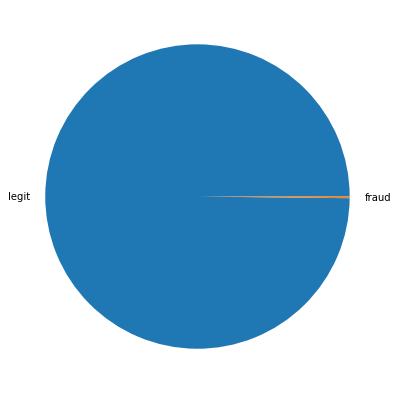

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
labels=['legit', 'fraud']
plt.pie(cc_data['Class'].value_counts(),labels= labels)

In [ ]:
legit.Amount.describe()      # statistical measures of the data

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

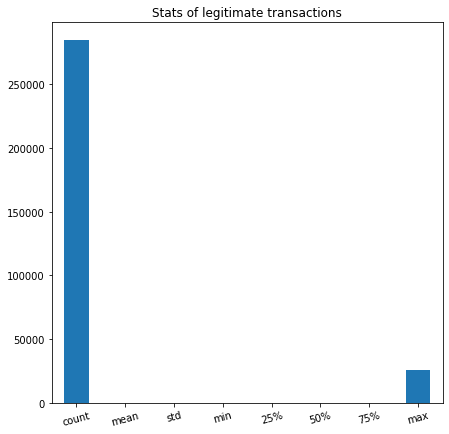

In [ ]:
plt.figure(figsize=(7,7))
legit.Amount.describe().plot.bar(rot=15, title="Stats of legitimate transactions");
plt.show(block=True);

In [ ]:
fraud.Amount.describe()       # statistical measures of the data

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

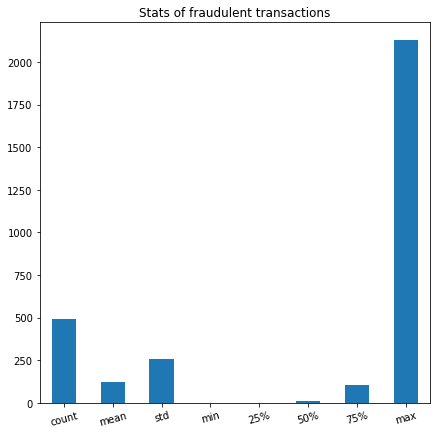

In [ ]:
plt.figure(figsize=(7,7))
fraud.Amount.describe().plot.bar(rot=15, title="Stats of fraudulent transactions");
plt.show(block=True);

In [ ]:
cc_data.groupby('Class').mean()   # compare the values for both transactions

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,-0.006576,0.010832,0.000189,0.012064,0.000161,0.007164,0.011535,0.003887,-0.001178,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


**Pre-Processing** (Under-sampling)

In [ ]:
legit_sample = legit.sample(n=492)       #Under-Sampling
new_dataset = pd.concat([legit_sample, fraud], axis=0)  #Concatenating two DataFrames
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
209801,137714.0,-0.323257,0.011393,0.773061,-2.210513,0.709319,-1.340951,0.930514,-0.552130,-1.323125,-0.008951,-0.688849,-0.394784,0.775202,-0.520320,-1.067905,0.607488,0.018628,-1.994387,0.115167,0.156381,0.086810,0.324919,-0.214036,0.015388,0.026484,-0.419231,-0.084783,-0.088144,9.57,0
117758,74798.0,1.481040,-0.312166,-0.405990,-0.769881,-0.406834,-1.125294,-0.044156,-0.373082,-1.099458,0.690384,-0.695410,-0.847223,0.080609,0.110413,0.472627,0.877635,0.234188,-1.423523,0.823300,0.075441,0.157028,0.382257,-0.225832,-0.075383,0.854565,-0.053576,-0.030533,-0.003193,15.00,0
154810,103114.0,2.034135,-0.033538,-0.837399,0.289100,0.028755,-0.666397,-0.131038,-0.258947,1.793044,-0.306349,0.342537,-2.155138,1.964155,1.718618,0.148335,0.456493,0.084139,-0.479209,-0.133925,-0.159501,-0.609701,-1.595870,0.567793,0.554283,-0.711845,-0.049344,-0.101978,-0.044982,22.93,0
145769,87184.0,-0.934426,0.300587,-0.632299,-2.802944,1.910548,-1.514880,2.341866,-1.160422,1.224516,0.887327,0.740640,0.218899,-0.819513,-0.401315,-1.651049,-0.634496,-1.288734,-0.363469,-0.463519,0.300588,-0.139745,0.956516,-0.014617,-0.328441,-0.168368,0.458381,0.012157,-0.364024,8.00,0
166249,117953.0,2.153838,-1.147795,-1.042192,-1.216068,-0.437625,0.550506,-1.172909,0.188025,-0.016176,0.897405,-0.078148,-0.338045,-0.017993,-0.286517,-0.321889,1.633701,-0.437010,-0.326557,1.058049,0.055482,0.315176,0.873641,0.024100,-0.329214,-0.058037,-0.073287,-0.002591,-0.059153,33.00,0


In [ ]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,2.115795,-5.417424,-1.235123,-6.665177,0.401701,-2.897825,-4.570529,-1.315147,0.391167,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,2.858466,-3.096915,-0.792532,-5.210141,-0.613803,-2.155297,-3.267116,-0.688505,0.737657,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,1.794969,-2.775022,-0.418950,-4.057162,-0.712616,-1.603015,-5.035326,-0.507000,0.266272,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,1.933520,-5.030465,-1.127455,-6.416628,0.141237,-2.549498,-4.614717,-1.478138,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,-0.888722,0.491140,0.728903,0.380428,-1.948883,-0.832498,0.519436,0.903562,1.197315,0.593509,-0.017652,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [ ]:
new_dataset['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

([<matplotlib.patches.Wedge at 0x7f588a21b210>,
 [Text(6.735557395310444e-17, 1.1, 'legitimate'),
  Text(-2.0206672185931328e-16, -1.1, 'fraudulant')])

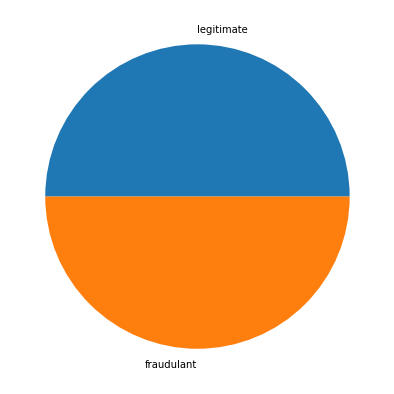

In [ ]:
plt.figure(figsize=(7,7))
labels=['legitimate', 'fraudulant']
plt.pie(new_dataset['Class'].value_counts(),labels= labels)

In [ ]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,96618.380081,0.093097,-0.040992,0.058088,0.025632,-0.006393,-0.040183,0.050564,-0.080260,-0.016013,0.010351,0.002469,-0.015240,0.002107,0.008974,0.095127,0.012039,-0.014784,0.055398,-0.008903,0.053557,0.026672,0.030452,-0.026496,-0.014018,-0.019744,0.020988,0.003006,0.001538,99.632195
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [ ]:
X = new_dataset.drop(columns='Class', axis=1)  #dropping 'Class' column
Y = new_dataset['Class']

**Splitting Dataset**   Train:Test= 80:20

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)  #spliting dataset in 80:20


In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


**Evaluation by Logistic Regression**

In [ ]:
model = LogisticRegression() #model training

In [ ]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
# evaluation on training data
X_train_prediction = model.predict(X_train)

print('Evaluation on Training data (Logistic regression)')

print("Accuracy:",metrics.accuracy_score(X_train_prediction, Y_train))
print("Precision:",metrics.precision_score(X_train_prediction, Y_train))
print("Recall:",metrics.recall_score(X_train_prediction, Y_train))
print("f1-score:", metrics.f1_score(X_train_prediction, Y_train))


Evaluation on Training data (Logistic regression)
Accuracy: 0.9301143583227446
Precision: 0.8959390862944162
Recall: 0.9618528610354223
f1-score: 0.9277266754270695


In [ ]:
# evaluation on test data
X_test_prediction = model.predict(X_test)

print('Evaluation on Test data (Logistic regression)')

print("Accuracy:",metrics.accuracy_score(X_test_prediction, Y_test))
print("Precision:",metrics.precision_score(X_test_prediction, Y_test))
print("Recall:",metrics.recall_score(X_test_prediction, Y_test))
print("f1-score:", metrics.f1_score(X_test_prediction, Y_test))


Evaluation on Test data (Logistic regression)
Accuracy: 0.9238578680203046
Precision: 0.8673469387755102
Recall: 0.9770114942528736
f1-score: 0.9189189189189189


**Evaluation by KNN Classifier**

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
# evaluation on training data
knn= KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
y_pr = knn.predict(X_train)

print('Evalutaion on Training data (KNN)')

print("Accuracy:",metrics.accuracy_score(Y_train, y_pr))
print("Precision:",metrics.precision_score(Y_train, y_pr))
print("Recall:",metrics.recall_score(Y_train, y_pr))
print("f1-score:", metrics.f1_score(Y_train, y_pr))

Evalutaion on Training data (KNN)
Accuracy: 0.8017789072426937
Precision: 0.8035714285714286
Recall: 0.799492385786802
f1-score: 0.8015267175572518


In [ ]:
# evaluation on test data
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics



y_pred = knn.predict(X_test)
print('Evalutaion on Testing data (KNN)')

print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))
print("Precision:",metrics.precision_score(Y_test, y_pred))
print("Recall:",metrics.recall_score(Y_test, y_pred))
print("f1-score:", metrics.f1_score(Y_test, y_pred))



Evalutaion on Testing data (KNN)
Accuracy: 0.700507614213198
Precision: 0.7010309278350515
Recall: 0.6938775510204082
f1-score: 0.6974358974358974


**Evaluation by SVM**

In [ ]:
from sklearn import svm
clf = svm.SVC() 
clf.fit(X_train, Y_train)
y_pred1 = clf.predict(X_train)

In [ ]:
# evaluation on training data
print('Evalutaion on Training data (SVM)')
print("Accuracy:",metrics.accuracy_score(Y_train, y_pred1))
print("Precision:",metrics.precision_score(Y_train, y_pred1))
print("Recall:",metrics.recall_score(Y_train, y_pred1))
print("f1-score:", metrics.f1_score(Y_train, y_pred1))

Evalutaion on Training data (SVM)
Accuracy: 0.5374841168996188
Precision: 0.5382653061224489
Recall: 0.5355329949238579
f1-score: 0.5368956743002545


In [ ]:
# evaluation on test data
y_pre1 = clf.predict(X_test)
print('Evalutaion on Training data (SVM)')
print("Accuracy:",metrics.accuracy_score(Y_test, y_pre1))
print("Precision:",metrics.precision_score(Y_test, y_pre1))
print("Recall:",metrics.recall_score(Y_test, y_pre1))
print("f1-score:", metrics.f1_score(Y_test, y_pre1))

Evalutaion on Training data (SVM)
Accuracy: 0.5634517766497462
Precision: 0.5666666666666667
Recall: 0.5204081632653061
f1-score: 0.5425531914893617


**Evaluation by Decision Tree**

In [ ]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
cl = DecisionTreeClassifier()

In [ ]:
# evaluation on training data
cl = cl.fit(X_train,Y_train)
y_p = cl.predict(X_train)
print('Evalutaion on Training data (Decision Tree)')
print("Accuracy:",metrics.accuracy_score(Y_train, y_p))
print("Precision:",metrics.precision_score(Y_train, y_p))
print("Recall:",metrics.recall_score(Y_train, y_p))
print("f1-score:", metrics.f1_score(Y_train, y_p))

Evalutaion on Training data (Decision Tree)
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
f1-score: 1.0


In [ ]:
# evaluation on test data

y_pt = cl.predict(X_test)
print('Evalutaion on Test data (Decision Tree)')
print("Accuracy:",metrics.accuracy_score(Y_test, y_pt))
print("Precision:",metrics.precision_score(Y_test, y_pt))
print("Recall:",metrics.recall_score(Y_test, y_pt))
print("f1-score:", metrics.f1_score(Y_test, y_pt))

Evalutaion on Test data (Decision Tree)
Accuracy: 0.8375634517766497
Precision: 0.8235294117647058
Recall: 0.8571428571428571
f1-score: 0.84


In [ ]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

X, y = make_classification(n_samples=100, n_features=3, n_informative=2, n_redundant=1, random_state=1)



importance = cl.feature_importances_

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.01386
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.04948
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00856
Feature: 7, Score: 0.00798
Feature: 8, Score: 0.01525
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.02473
Feature: 11, Score: 0.01001
Feature: 12, Score: 0.01337
Feature: 13, Score: 0.00339
Feature: 14, Score: 0.76576
Feature: 15, Score: 0.00164
Feature: 16, Score: 0.00914
Feature: 17, Score: 0.00339
Feature: 18, Score: 0.00851
Feature: 19, Score: 0.00685
Feature: 20, Score: 0.01115
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00339
Feature: 23, Score: 0.02501
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.01367
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00485


[Text(569.2830882352941, 1050.96, 'X[14] <= -2.277\ngini = 0.5\nsamples = 787\nvalue = [393, 394]'),
 Text(205.14705882352942, 978.48, 'X[10] <= 3.637\ngini = 0.034\nsamples = 345\nvalue = [6, 339]'),
 Text(164.11764705882354, 906.0, 'X[11] <= -0.959\ngini = 0.023\nsamples = 343\nvalue = [4, 339]'),
 Text(123.08823529411765, 833.52, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(205.14705882352942, 833.52, 'X[12] <= 0.672\ngini = 0.017\nsamples = 342\nvalue = [3, 339]'),
 Text(164.11764705882354, 761.04, 'X[12] <= -0.467\ngini = 0.012\nsamples = 341\nvalue = [2, 339]'),
 Text(123.08823529411765, 688.56, 'gini = 0.0\nsamples = 328\nvalue = [0, 328]'),
 Text(205.14705882352942, 688.56, 'X[25] <= 0.782\ngini = 0.26\nsamples = 13\nvalue = [2, 11]'),
 Text(164.11764705882354, 616.08, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(246.1764705882353, 616.08, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(246.1764705882353, 761.04, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(2

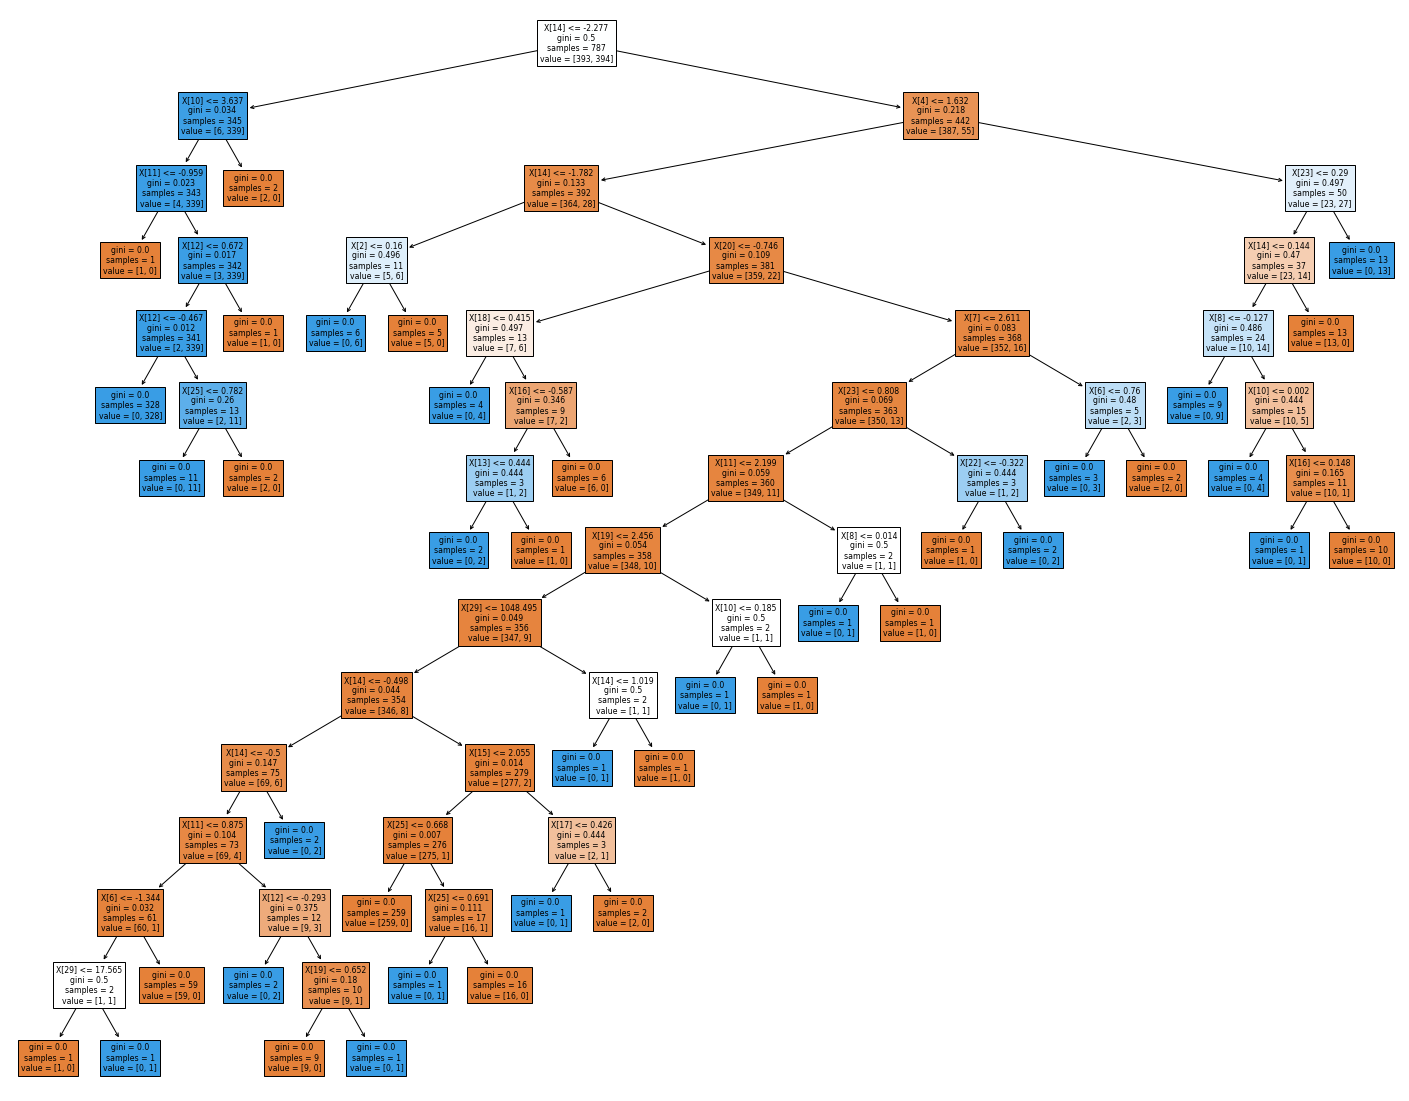

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import tree
plt.figure(figsize=(25,20))
tree.plot_tree(cl, filled= True)


**Evaluation by Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=200, criterion='gini', min_samples_split=5, min_samples_leaf=2, max_features='auto', bootstrap=True, n_jobs=-1, random_state=42)
model.fit(X_train,Y_train)
y_pred2 = model.predict(X_train)

In [ ]:
#n_estimators=200, criterion='gini', min_samples_split=5, min_samples_leaf=2, max_features='auto', bootstrap=True, n_jobs=-1, random_state=42

In [ ]:
# evaluation on training data
print('Evalutaion on Training data (Random Forest)')
print("Accuracy:",metrics.accuracy_score(Y_train, y_pred2))
print("Precision:",metrics.precision_score(Y_train, y_pred2))
print("Recall:",metrics.recall_score(Y_train, y_pred2))
print("f1-score:", metrics.f1_score(Y_train, y_pred2))

Evalutaion on Training data (Random Forest)
Accuracy: 0.98856416772554
Precision: 1.0
Recall: 0.9771573604060914
f1-score: 0.988446726572529


In [ ]:
# evaluation on test data
y_pre2 = model.predict(X_test)
print('Evalutaion on Training data (Random Forest)')

print("Accuracy:",metrics.accuracy_score(Y_test, y_pre2))
print("Precision:",metrics.precision_score(Y_test, y_pre2))
print("Recall:",metrics.recall_score(Y_test, y_pre2))
print("f1-score:", metrics.f1_score(Y_test, y_pre2))

Evalutaion on Training data (Random Forest)
Accuracy: 0.9137055837563451
Precision: 0.9655172413793104
Recall: 0.8571428571428571
f1-score: 0.908108108108108


**Comparing the performance of various algorithms**

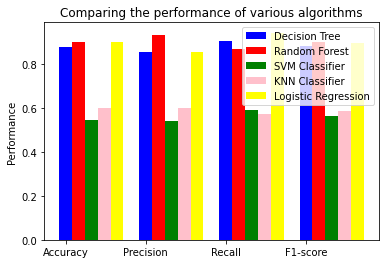

<Figure size 504x504 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
labels=['Accuracy', 'Precision','Recall','F1-score']
D_tree=[0.8781725888324873,0.8557692307692307, 0.9081632653061225, 0.8811881188118811]
R_forest=[0.9035532994923858,0.9340659340659341,0.8673469387755102, 0.8994708994708994]
SVM=[0.5482233502538071,0.5420560747663551, 0.5918367346938775, 0.5658536585365854]
KNN=[0.5989847715736041,0.6021505376344086, 0.5714285714285714, 0.5863874345549738]
L_Reg=[0.9035532994923858, 0.8571428571428571, 0.9438202247191011, 0.8983957219251337]
x=np.arange(len(labels))
width=0.16
fif, ax=plt.subplots()
plt.figure(figsize=(7,7))
bar1=ax.bar(x, D_tree,width, label='Decision Tree', color='Blue')
bar2=ax.bar(x+width,R_forest, width, label='Random Forest',color='Red')
bar3=ax.bar(x+width*2,SVM,width,label='SVM Classifier', color='Green')
bar4=ax.bar(x+width*3,KNN,width,label='KNN Classifier', color='Pink')
bar5=ax.bar(x+width*4,L_Reg,width,label='Logistic Regression', color='Yellow')
ax.set_ylabel('Performance')
ax.set_title('Comparing the performance of various algorithms')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()